# Generate visuals for report

### Import packages, load data

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('data/last_samples_complete_all_v2.csv')

df_all = pd.read_csv('data/set_subset_responses_complete.csv') #all of the 46k responses

### Overall Confidence Plots

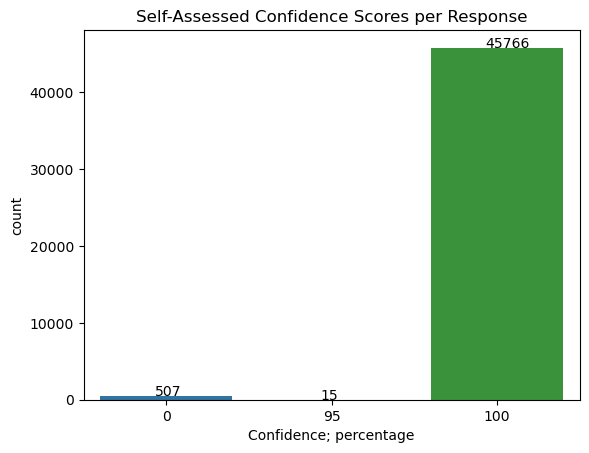

In [68]:
df_all2 = df_all[df_all['confidence'] != '[]']
gg = sns.countplot(x='confidence', data=df_all2)
gg.set(xlabel='Confidence; percentage',
       title='Self-Assessed Confidence Scores per Response')

for p in gg.patches:
    gg.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+0.1))

In [88]:
x, y  = 'confidence', 'True or False'

df1_all3 = df_all2.groupby(x)[y].value_counts()
df1_all3 = df1_all3.mul(1)
df1_all3 = df1_all3.rename('percent; %').reset_index()

### Self-Assessed Confidence Scores per True/False Response

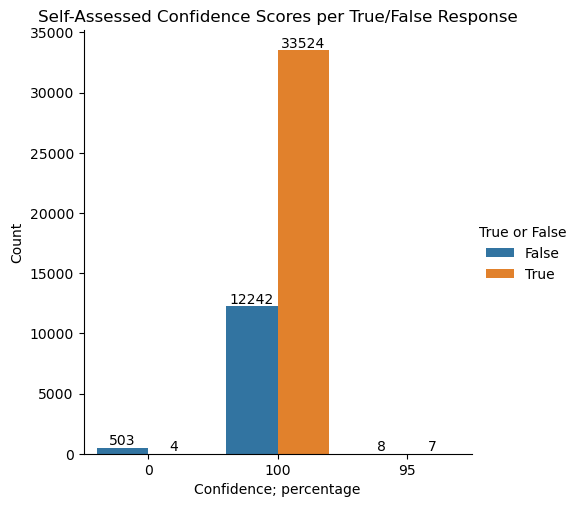

In [90]:
ggg=sns.catplot(x=x, y='percent; %',kind='bar', 
              data=df1_all3, hue=y)

ggg.tick_params(axis='x', rotation=0)

ggg.set(xlabel='Confidence; percentage',
        ylabel="Count",
       title='Self-Assessed Confidence Scores per True/False Response')

ax = ggg.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

#### True or false rates per each category

In [44]:
x, y  = 'classLabel.value', 'True or False'

df1_all = df_all.groupby(x)[y].value_counts(normalize=True, ascending=False).sort_values()
df1_all = df1_all.mul(100)
df1_all = df1_all.rename('percent; %').reset_index()



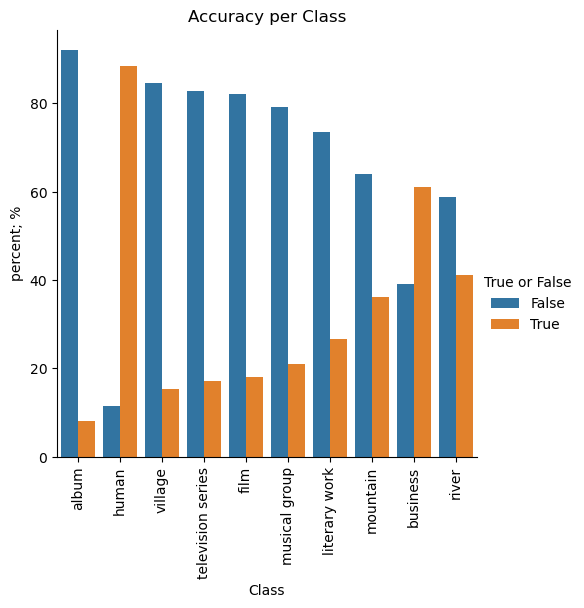

In [45]:
g=sns.catplot(x=x, y='percent; %',kind='bar', 
              data=df1_all, hue=y)

g.tick_params(axis='x', rotation=90)

g.set(xlabel='Class',
       title='Accuracy per Class')

plt.show()

In [47]:
x, y  = 'classLabel.value', 'error_category'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent; %').reset_index()

### Error Modes per Class

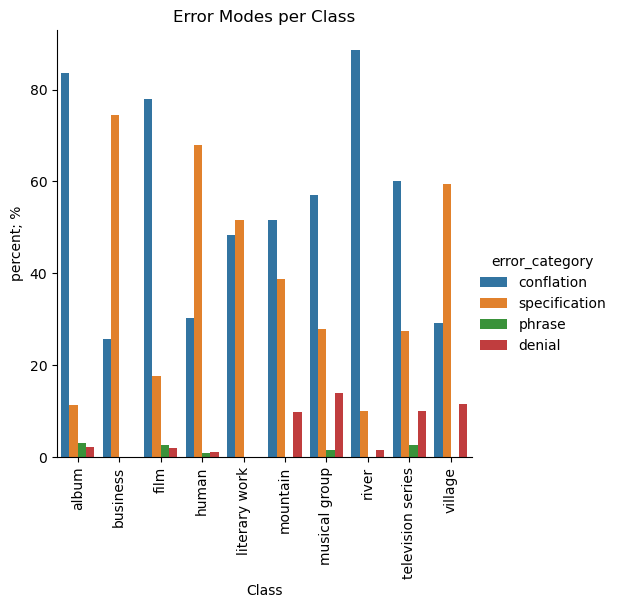

In [48]:
g=sns.catplot(x=x, y='percent; %',kind='bar', data=df1, hue=y)

g.tick_params(axis='x', rotation=90)

g.set(xlabel='Class',
       title='Error Modes per Class')
plt.show()